## PART 2: Predictive Distribution 

Generate data

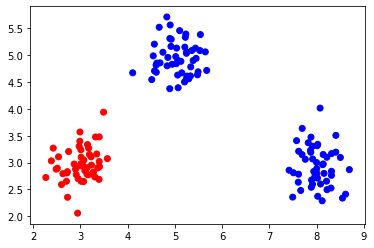

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance
from scipy import linalg

N1 = 50
N2 = 50
K = 2 
sigma = 0.1

mean = (3,3)
cov = [[sigma, 0],[0, sigma]]
X1 = np.random.multivariate_normal(mean, cov, N1)
c1 = ['red']*len(X1)


mean = (5,5)
cov = [[sigma, 0],[0, sigma]]
X2 = np.random.multivariate_normal(mean, cov, N2)
X_out = np.random.multivariate_normal((8,3), cov, N2)
X2 = np.concatenate((X2,X_out))
c2 = ['blue']*len(X2*2)


X = np.concatenate((X1,X2))

color = np.concatenate((c1,c2))

T = 0*np.ones([len(X),1])
for n in range(0, len(X)):
    if(n<len(X1)):
        T[n] = 0
    if(n>=N1 and n<len(X1)+len(X2)):
        T[n] = 1
T = T.astype(int)

total_N = N1+N2+N2
plt.scatter(X[:,0], X[:,1], marker='o', c=color)
plt.show()

#print(T)

Based on the generated data, compute the probability map:

In [10]:
import math
def sigmoid(in_matrix):
    return 1/(1+np.exp(-in_matrix))

def generate_sigmoid(w,in_matrix):
    temp = np.matrix.flatten(np.array([(sigmoid(np.matmul(w.transpose(),in_matrix[i,:]))) 
                     for i in range(in_matrix.shape[0])]))
    return temp
    
def generate_R(w,in_matrix):
    temp = np.matrix.flatten(np.array([(sigmoid(np.matmul(w.transpose(),in_matrix[i,:])))*
                                       (1-(sigmoid(np.matmul(w.transpose(),in_matrix[i,:])))) 
                     for i in range(in_matrix.shape[0])]))
    return np.diag(temp)

X_new = np.concatenate((np.reshape(np.ones(150), (150,1)), X), axis=1)
#print(X_new)
M = 3
alpha =  20
S_inverse = (1/alpha) * np.identity(M)
w_initial =  np.zeros([M,1])
#print(w_initial)
def generate_wmap(w=w_initial, X=X_new):
    R = generate_R(w, X)
    print(R)
    H = S_inverse + np.linalg.multi_dot((X.transpose(), R ,X))
    print(H)
    E_1 =  (np.matmul(S_inverse, w) + 
            np.matmul(X.transpose(),
                      (np.reshape(generate_sigmoid(w, X), (total_N,1))
                       - T)))
    print(E_1)
    H_inverse = np.linalg.inv(H)
    w_new = w - np.matmul(H_inverse, E_1)
    print("w\n", w_new)
    s_new = H_inverse
    return w_new, s_new

res = generate_wmap(w_initial, X_new)
old = res[0]
new = np.reshape(np.array([10,10,10]), (M,1))
print(res[1])
counter = 0
while ( abs((new-old)[1]) > 0.000001 and abs((new-old)[0]) > 0.000001):
    old = res[0]
    res = generate_wmap(res[0], X_new)
    new = res[0]
    counter = counter + 1 
    # print(abs((new-old)[1]))

# print(counter) 
w_map = (res[0])
sigma_fb = (res[1])
print(w_map)
print(sigma_fb)

#[sigmoid(np.matmul(w_map.transpose(), np.reshape(X_new[i,:], (M,1)))) for i in range(150)]

[[0.25 0.   0.   ... 0.   0.   0.  ]
 [0.   0.25 0.   ... 0.   0.   0.  ]
 [0.   0.   0.25 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.25 0.   0.  ]
 [0.   0.   0.   ... 0.   0.25 0.  ]
 [0.   0.   0.   ... 0.   0.   0.25]]
[[  37.55        200.83398411  135.48976943]
 [ 200.83398411 1237.20573745  716.97503685]
 [ 135.48976943  716.97503685  526.86959054]]
[[ -25.        ]
 [-251.28710866]
 [-122.5181835 ]]
w
 [[-7.07434161]
 [ 0.76848235]
 [ 1.00601068]]
[[ 0.59811255 -0.03763588 -0.10259492]
 [-0.03763588  0.00619185  0.00125244]
 [-0.10259492  0.00125244  0.02657696]]
[[0.07195343 0.         0.         ... 0.         0.         0.        ]
 [0.         0.11765655 0.         ... 0.         0.         0.        ]
 [0.         0.         0.10887858 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.10423561 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07076688 0.        ]
 [0.         0.         0.         ... 0.      

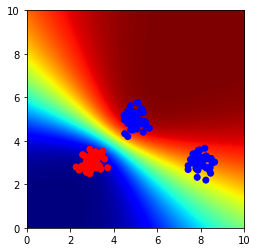

In [22]:
# generate grid and data points
x_grid = np.arange(0,10,0.1)
grid_matrix = np.zeros([len(x_grid),len(x_grid)])

for i in range(len(x_grid)):
    for j in range(len(x_grid)):
        x_star = np.reshape(np.array([1, x_grid[i], x_grid[j]]), (M,1))
        a_map = np.matmul(w_map.transpose(), x_star)
        sigma_star = np.linalg.multi_dot((x_star.transpose(), 
                                          (sigma_fb), x_star))
        final_p = sigmoid(a_map/pow((1+(3.1415926/8)*sigma_star),0.5))
        grid_matrix[i,j] = final_p

#print(grid_matrix)

plt.scatter(X[:,0], X[:,1], marker='o', c=color)
plt.imshow(grid_matrix, cmap ='jet', 
           interpolation='bilinear', origin='lower', extent=[0,10,0,10])

Ask the user to enter any new value of x, and your task is to provide the decision whether it belongs to C1 or C2, and its uncertainty information.

In [19]:
val = input("Enter your new value of x as 2 values seperated by comma: ")
x1, x2 = val.split(",")
x_star = np.reshape(np.array([1,int(x1),int(x2)]), (M,1))
a_map = np.matmul(w_map.transpose(), x_star)
sigma_star = np.linalg.multi_dot((x_star.transpose(), 
                                  (sigma_fb), x_star))
final_p = sigmoid(a_map/pow((1+(3.1415926/8)*sigma_star),0.5))

if final_p < 0.5:
    print("Your new value of x belongs to C1.")
    print("The probability of new x belonging to C1 is ", str(1-final_p[0]), 
          ", and the probability of new x belonging to C2 is ", str(final_p[0]), sep="")
else:
    print("Your new value of x belongs to C2.")
    print("The probability of new x belonging to C2 is ", str(final_p[0]), 
          ", and the probability of new x belonging to C1 is ", str(1-final_p[0]), sep="")

Enter your new value of x as 2 values seperated by comma: 5,5
Your new value of x belongs to C2.
The probability of new x belonging to C2 is [0.96998426], and the probability of new x belonging to C1 is [0.03001574]
